<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/main/Shishkin%20Sergey/%D0%92%D0%BB%D0%B8%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%9A%D0%A2_%D0%BD%D0%B0_%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%B7%D0%B0%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2_%D1%82%D0%BE%D0%B2%D0%B0%D1%80%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Проект**: Прогнозирование продаж товаров на маркетплейсах

**Задание: Для карточек товара лампы, лампы ксенон, фары - выявить влияние заполненности КТ на количество заказов товара.**

---



# 1. Обработка базы данных

In [ ]:
#pip install phik
#import phik
#from phik.report import plot_correlation_matrix
#from phik import report

In [ ]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set() #визуализация данных

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Загрузка файла в colab
sales = pd.read_excel('/content/gdrive/MyDrive/Аналитика Графики 01.06.2022-31.05.2023.xlsx', sheet_name= 'Sheet1')
content = pd.read_csv('/content/gdrive/MyDrive/База.csv', sep=";", header=0)
sales.head()
content.head()

,Артикул,Ozon Product ID,FBO OZON SKU ID,FBS OZON SKU ID,Barcode,Наименование товара,Контент-рейтинг,Бренд,Статус товара,Видимость FBO,...,"Вывезти и нанести КИЗ (кроме Твери), шт","Зарезервировано, шт","Доступно на моих складах, шт","Зарезервировано на моих складах, шт","Текущая цена с учетом скидки, руб.","Цена до скидки (перечеркнутая цена), руб.","Цена Premium, руб.","Рыночная цена, руб.",Актуальная ссылка на рыночную цену,"Размер НДС, %"
0,'30273,105606938,298131117,298131122,2000000036618,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Продается,Показывается,...,0,0,26,0,1200.0,1800.0,NaN,NaN,NaN,0%
1,'30383,105742204,298264198,298264234,2000000037899,Биксеноновая линза GNX Hella 3R Crystal Vision...,'37.5,GNX,Продается,Показывается,...,0,0,410,0,1990.0,3500.0,NaN,NaN,NaN,0%
2,'31284,112525698,303785665,303785701,NaN,Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K ...,'30,Aozoom,Продается,Показывается,...,0,0,10,0,7900.0,NaN,NaN,NaN,NaN,0%
3,'25775,175507357,409388811,409388809,2000000005034,Герметик для фар жесткий бутиловый черный (4 м...,'17.5,GNX,Продается,Показывается,...,0,0,873,0,1200.0,NaN,NaN,NaN,NaN,0%
4,'29740,175521273,409666236,409666237,2000000030531,Линзы ксенон для фар Ford Focus 2 2007-2011 (C...,'15,GNX,Продается,Показывается,...,0,0,47,0,4500.0,6300.0,NaN,NaN,NaN,0%


In [ ]:
# Общая информация
sales.info()
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254748 entries, 0 to 254747
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  254748 non-null  object
 1   Товары                                                 254748 non-null  object
 2   Модель                                                 211411 non-null  object
 3   Ozon ID                                                254748 non-null  int64 
 4   Артикул                                                254748 non-null  object
 5   День                                                   254748 non-null  object
 6   Уникальные посетители, всего                           254748 non-null  int64 
 7   Уникальные посетители с просмотром карточки товара     254748 non-null  int64 
 8   Показы, всего                               

In [ ]:
# удаляем не информативные колонки для выполнения поставленной задачи
sales_1 = sales[['Категория 3-го уровня', 'Товары', 'Артикул', 'Показы, всего', 'Заказано товаров']]
content_1 = content[['Артикул', 'Контент-рейтинг']]
sales_1.head()
content_1.head()

,Артикул,Контент-рейтинг
0,'30273,'15
1,'30383,'37.5
2,'31284,'30
3,'25775,'17.5
4,'29740,'15


In [ ]:
# Очистка данных столбца Артикул и Контент-рейтинг и перевод в числовой формат
content_1['Артикул'] = content_1['Артикул'].str.replace('\'','').astype(str)
content_1['Контент-рейтинг'] = content_1['Контент-рейтинг'].str.replace('\'','').str.replace('Рассчитываем','0').str.replace('Не рассчитываем контент-рейтинг для уценки FBS','0').astype(float)
content_1.head()


<ipython-input-27-1e03bd51e1a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_1['Артикул'] = content_1['Артикул'].str.replace('\'','').astype(str)
<ipython-input-27-1e03bd51e1a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_1['Контент-рейтинг'] = content_1['Контент-рейтинг'].str.replace('\'','').str.replace('Рассчитываем','0').str.replace('Не рассчитываем контент-рейтинг для уценки FBS','0').astype(float)


,Артикул,Контент-рейтинг
0,30273,15.0
1,30383,37.5
2,31284,30.0
3,25775,17.5
4,29740,15.0


In [ ]:
# Товары которые ниразу небыли показаны не могли быть заказаны и из сранения удаляются
sales_1 = sales_1[sales_1['Показы, всего'] != 0]

In [ ]:
# Общая информация
content_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Артикул          1263 non-null   object 
 1   Контент-рейтинг  1263 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.9+ KB


In [ ]:
# Узнаем количество пропусков в ячейках
sales_1.isna().mean().sort_values(ascending=False)

Категория 3-го уровня    0.0
Товары                   0.0
Артикул                  0.0
Показы, всего            0.0
Заказано товаров         0.0
dtype: float64

In [ ]:
content_1.isna().mean().sort_values(ascending=False)

Артикул            0.0
Контент-рейтинг    0.0
dtype: float64

In [ ]:
# Определение количества категорий
list_cat = sales_1['Категория 3-го уровня'].unique()
print(list_cat)
print(len(list_cat))

['Разное автопринадлежности' 'Фара автомобильная' 'Лампа автомобильная'
 'Автохимия - Герметик, клей' 'Противотуманные фары'
 'Комплектующие для ксеноновых фар' 'Фонарь задний для авто'
 'Светодиодный модуль' 'Комплектующие светодиодной лампы для авто'
 'Другое']
10


In [ ]:
# для выявления влияния создаем три датафрейма товаров лампы, лампы ксенон, фары
sales_fara = sales_1[sales_1['Категория 3-го уровня'] == 'Фара автомобильная']
sales_fara.head()

,Категория 3-го уровня,Товары,Артикул,"Показы, всего",Заказано товаров
90,Фара автомобильная,Светодиодные линзы Aozoom A3+ RU (комплект),29276,1,0
91,Фара автомобильная,Светодиодные линзы Aozoom A3+ RU (комплект),29276,1,0
92,Фара автомобильная,Светодиодные линзы Aozoom A3+ RU (комплект),29276,1,0
93,Фара автомобильная,Светодиодные линзы Aozoom A3+ RU (комплект),29276,2,0
94,Фара автомобильная,Светодиодные линзы Aozoom A3+ RU (комплект),29276,2,0


In [ ]:
# лампы и лампы ксенон находятся в одной категории Лампа автомобильная

sales_xenon = sales_1[(sales_1['Категория 3-го уровня'] == 'Лампа автомобильная') & (sales_1['Товары'].str.contains('ксенон|xenon|газоразрядная', case=False))]

sales_xenon.head()

,Категория 3-го уровня,Товары,Артикул,"Показы, всего",Заказано товаров
90981,Лампа автомобильная,Лампа D2S-NX2S D2S 1V 35W P32d-2 стандарт Xeno...,25541,1,0
90982,Лампа автомобильная,Лампа D2S-NX2S D2S 1V 35W P32d-2 стандарт Xeno...,25541,1,0
90983,Лампа автомобильная,Лампа D2S-NX2S D2S 1V 35W P32d-2 стандарт Xeno...,25541,1,0
90985,Лампа автомобильная,Лампа D2S-NX2S D2S 1V 35W P32d-2 стандарт Xeno...,25541,1,0
90986,Лампа автомобильная,Лампа D2S-NX2S D2S 1V 35W P32d-2 стандарт Xeno...,25541,1,0


In [ ]:
sales_lamp = sales_1[(sales_1['Категория 3-го уровня'] == 'Лампа автомобильная') & (~sales_1['Товары'].str.contains('ксенон|xenon|газоразрядная', case=False))]

sales_lamp.head(15)

,Категория 3-го уровня,Товары,Артикул,"Показы, всего",Заказано товаров
94289,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,14,0
94290,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,88,2
94291,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,73,0
94292,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,108,0
94293,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,75,2
94294,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,99,0
94295,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,879,2
94296,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,1636,0
94297,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,1726,0
94298,Лампа автомобильная,Лампа Osram H11 Original 64211 (1шт),25626,2514,0


In [ ]:
# Группируем по Артикулу для формирования данных за год по каждому товару который был показан
grouped_fara = sales_fara.groupby('Артикул')['Показы, всего', 'Заказано товаров'].sum().reset_index()
print(grouped_fara)

    Артикул  Показы, всего  Заказано товаров
0     24743          52667                17
1     24767          19978                 4
2     24819           1320                 1
3     25332          31983                14
4     25581         148575               108
..      ...            ...               ...
343     800          23875                 7
344     805          34044                 8
345  FL10NS             26                 0
346  FL10VW              2                 0
347   FL25W              5                 0

[348 rows x 3 columns]


<ipython-input-47-a8cee4787883>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_fara = sales_fara.groupby('Артикул')['Показы, всего', 'Заказано товаров'].sum().reset_index()


In [ ]:
grouped_xenon = sales_xenon.groupby('Артикул')['Показы, всего', 'Заказано товаров'].sum().reset_index()
print(grouped_xenon)

   Артикул  Показы, всего  Заказано товаров
0      154         104895                77
1      161          70030               124
2      183          38195                14
3      186           3697                 6
4    24761            154                 0
5    25541            229                 0
6    25570              2                 0
7    26312          19805                 6
8    26824           1388                 2
9    28530         235806               202
10   28814              1                 0
11   28907          44509                 2
12   28908           9344                 0
13   29062            309                 2
14   29109          53575                 1
15   29119              1                 0
16   29539         360137               157
17   33669          40006                 0
18   33756              6                 0
19     849         128283               167
20     851              2                 0


<ipython-input-49-459e7b152ce7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_xenon = sales_xenon.groupby('Артикул')['Показы, всего', 'Заказано товаров'].sum().reset_index()


In [ ]:
grouped_lamp = sales_lamp.groupby('Артикул')['Показы, всего', 'Заказано товаров'].sum().reset_index()
print(grouped_lamp)

   Артикул  Показы, всего  Заказано товаров
0    24793             64                 4
1    25624           3197                 2
2    25625           7490                12
3    25626         109286                69
4    26175           9252                12
..     ...            ...               ...
84   34539          18815                 0
85   34597           1187                 0
86   34598            859                 1
87   34599            651                 0
88   34601           1688                 2

[89 rows x 3 columns]


<ipython-input-50-5f6e0c96c84d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_lamp = sales_lamp.groupby('Артикул')['Показы, всего', 'Заказано товаров'].sum().reset_index()


In [ ]:
#Добавляем столбец с Контент-рейтингом к каждому Артикулу в каждой выборке
fara_full = pd.merge(grouped_fara, content_1, on=['Артикул'], how='inner')
print(fara_full)

    Артикул  Показы, всего  Заказано товаров  Контент-рейтинг
0     24743          52667                17             15.0
1     24767          19978                 4             15.0
2     24819           1320                 1             15.0
3     25332          31983                14             15.0
4     25581         148575               108             32.5
..      ...            ...               ...              ...
339     424          85961                25             20.0
340     670          91679                20             15.0
341     799          60672                31             22.5
342     800          23875                 7             20.0
343     805          34044                 8             15.0

[344 rows x 4 columns]


In [ ]:
xenon_full = pd.merge(grouped_xenon, content_1, on=['Артикул'], how='inner')
print(xenon_full)

   Артикул  Показы, всего  Заказано товаров  Контент-рейтинг
0      154         104895                77              0.0
1      161          70030               124             52.5
2      183          38195                14              0.0
3      186           3697                 6              0.0
4    24761            154                 0             15.0
5    26312          19805                 6              0.0
6    26824           1388                 2              0.0
7    28530         235806               202              0.0
8    28814              1                 0              0.0
9    29062            309                 2             15.0
10   29109          53575                 1              0.0
11   29119              1                 0              0.0
12   29539         360137               157              0.0
13   33669          40006                 0              0.0
14   33756              6                 0              0.0
15     849         12828

In [ ]:
lamp_full = pd.merge(grouped_lamp, content_1, on=['Артикул'], how='inner')
print(lamp_full)

   Артикул  Показы, всего  Заказано товаров  Контент-рейтинг
0    24793             64                 4              0.0
1    25624           3197                 2              0.0
2    25625           7490                12              0.0
3    25626         109286                69             45.0
4    26175           9252                12             10.0
..     ...            ...               ...              ...
82   34539          18815                 0             40.0
83   34597           1187                 0             40.0
84   34598            859                 1             40.0
85   34599            651                 0             40.0
86   34601           1688                 2             35.0

[87 rows x 4 columns]


# Матрица корреляций corr

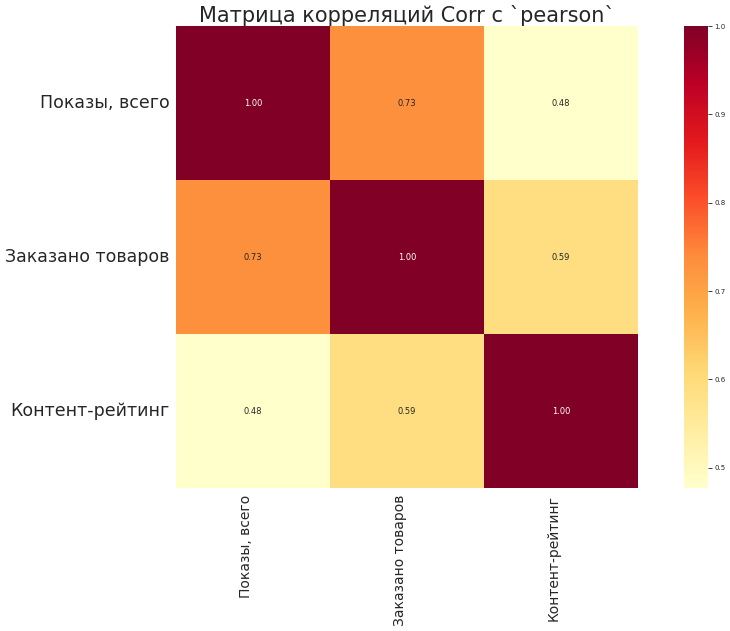

In [ ]:
# Построим матрицу кореляций с методом `pearson`
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(data=fara_full.corr(numeric_only=True), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций Corr с `pearson`', fontsize=30)
plt.show()

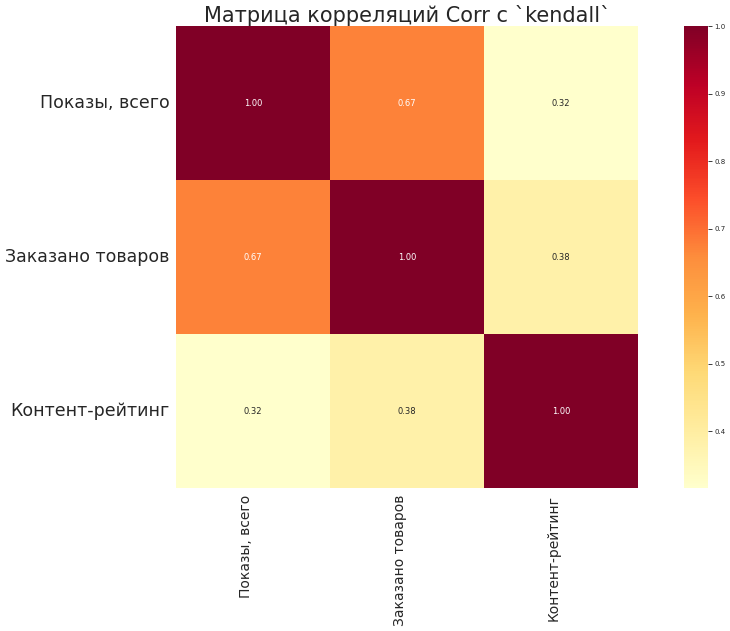

In [ ]:
# Построим матрицу кореляций с методом `kendall`
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(data=fara_full.corr(method='kendall', numeric_only=True), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций Corr с `kendall`', fontsize=30)
plt.show()

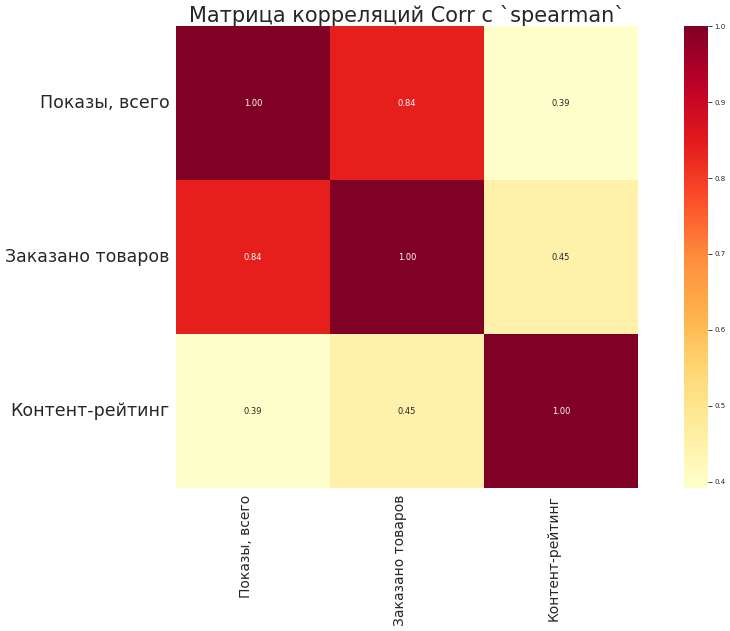

In [ ]:
# Построим матрицу кореляций с методом `spearman`
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(data=fara_full.corr(method='spearman', numeric_only=True), annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций Corr с `spearman`', fontsize=30)
plt.show()

# Матрица корреляций phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.4 MB/s eta 0:00:00


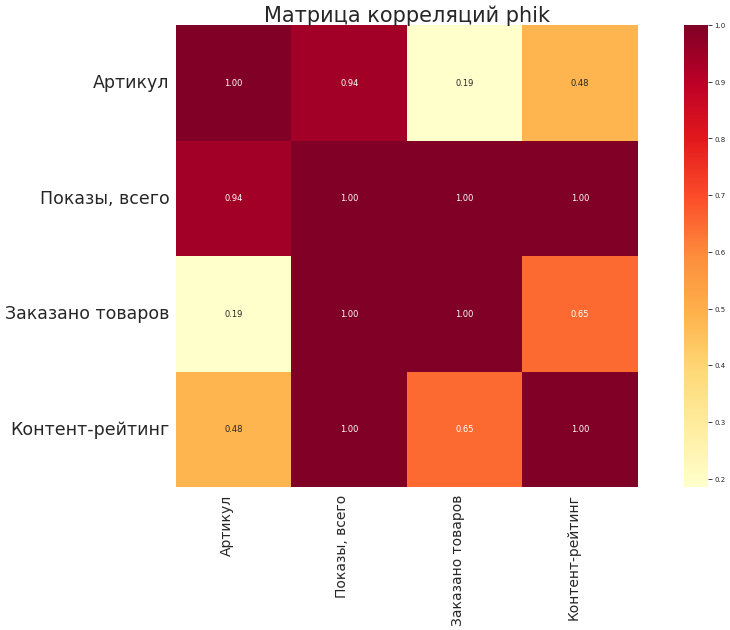

In [ ]:
# Вычисление корреляции с помощью phik
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

# Кореляция по товару Фары
phik_matrix = fara_full.phik_matrix(['Заказано товаров', 'Артикул', 'Контент-рейтинг'])

# Вывод полученной корреляционной матрицы
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(phik_matrix, annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций phik Фары' , fontsize=30)
plt.show()

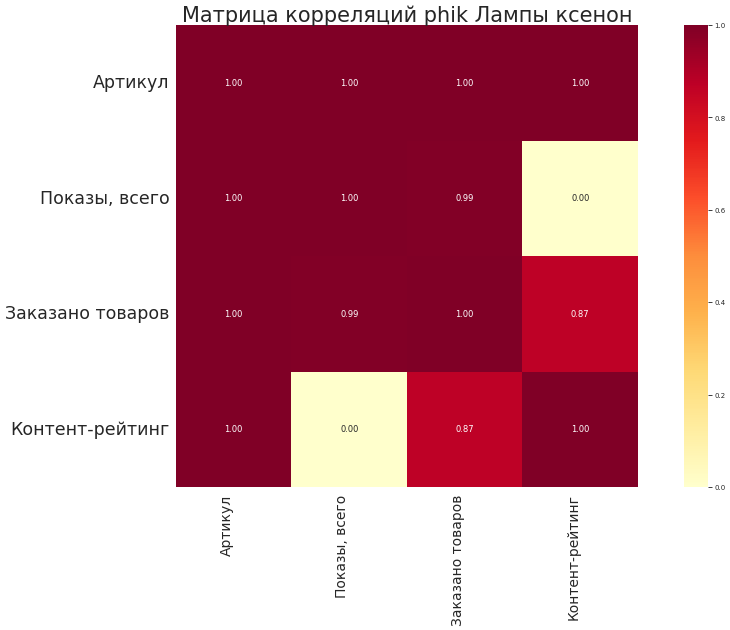

In [78]:
# Кореляция по товару Лампы
phik_matrix = xenon_full.phik_matrix(['Заказано товаров', 'Показы, всего', 'Контент-рейтинг'])

# Вывод полученной корреляционной матрицы
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(phik_matrix, annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций phik Лампы ксенон' , fontsize=30)
plt.show()

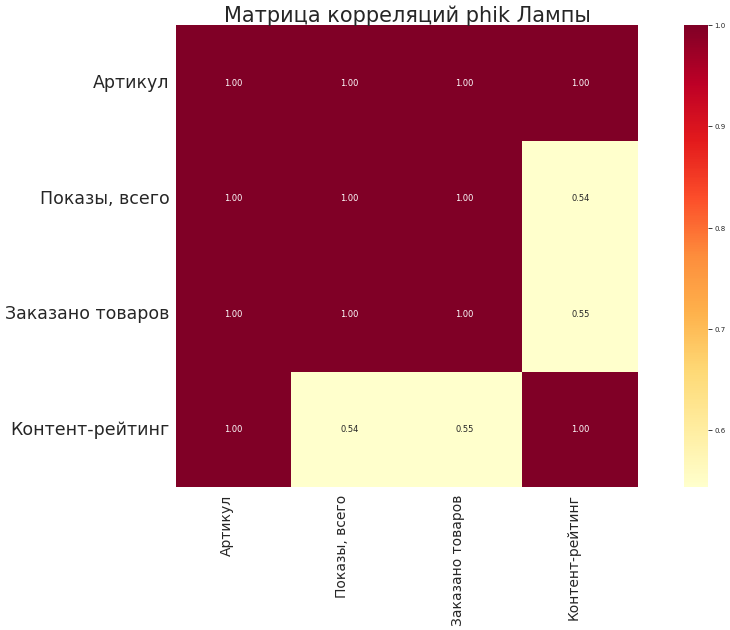

In [79]:
# Кореляция по товару Лампы ксенон
phik_matrix = lamp_full.phik_matrix(['Заказано товаров', 'Показы, всего', 'Контент-рейтинг'])

# Вывод полученной корреляционной матрицы
plt.figure(figsize=(24, 12), dpi=50)
heatmap = sns.heatmap(phik_matrix, annot=True, fmt='.2f', square=True, cmap='YlOrRd')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=25)
plt.title('Матрица корреляций phik Лампы' , fontsize=30)
plt.show()

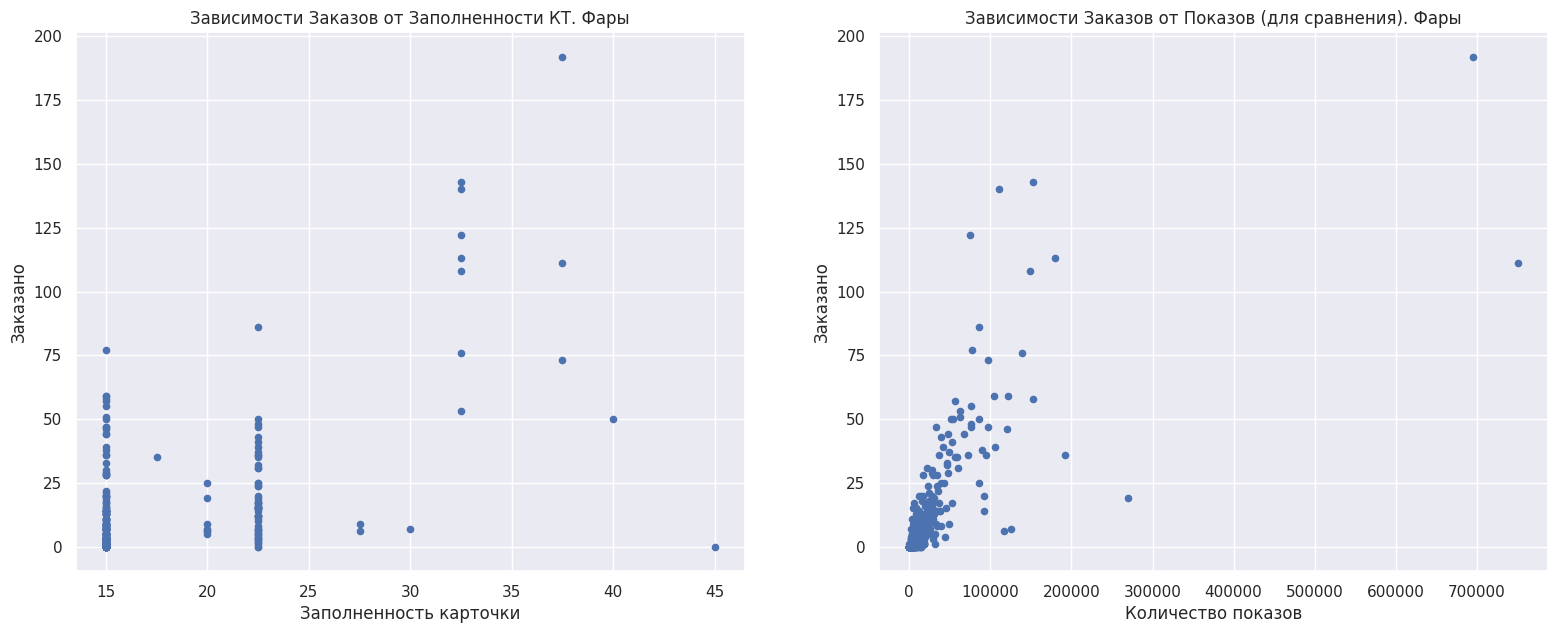

In [83]:
x = fara_full['Контент-рейтинг']
y = fara_full['Заказано товаров']
z = fara_full['Показы, всего']
# Построение и вывод графика
plt.figure(figsize=(19, 7))
plt.subplot(121)
plt.title('Зависимости Заказов от Заполненности КТ. Фары')
plt.scatter(x, y, s=20, c="b", marker='o')
plt.xlabel('Заполненность карточки')
plt.ylabel('Заказано')
plt.subplot(122)
plt.title('Зависимости Заказов от Показов (для сравнения). Фары')
plt.scatter(z, y, s=20, c="b", marker='o')
plt.xlabel('Количество показов')
plt.ylabel('Заказано')
plt.show()

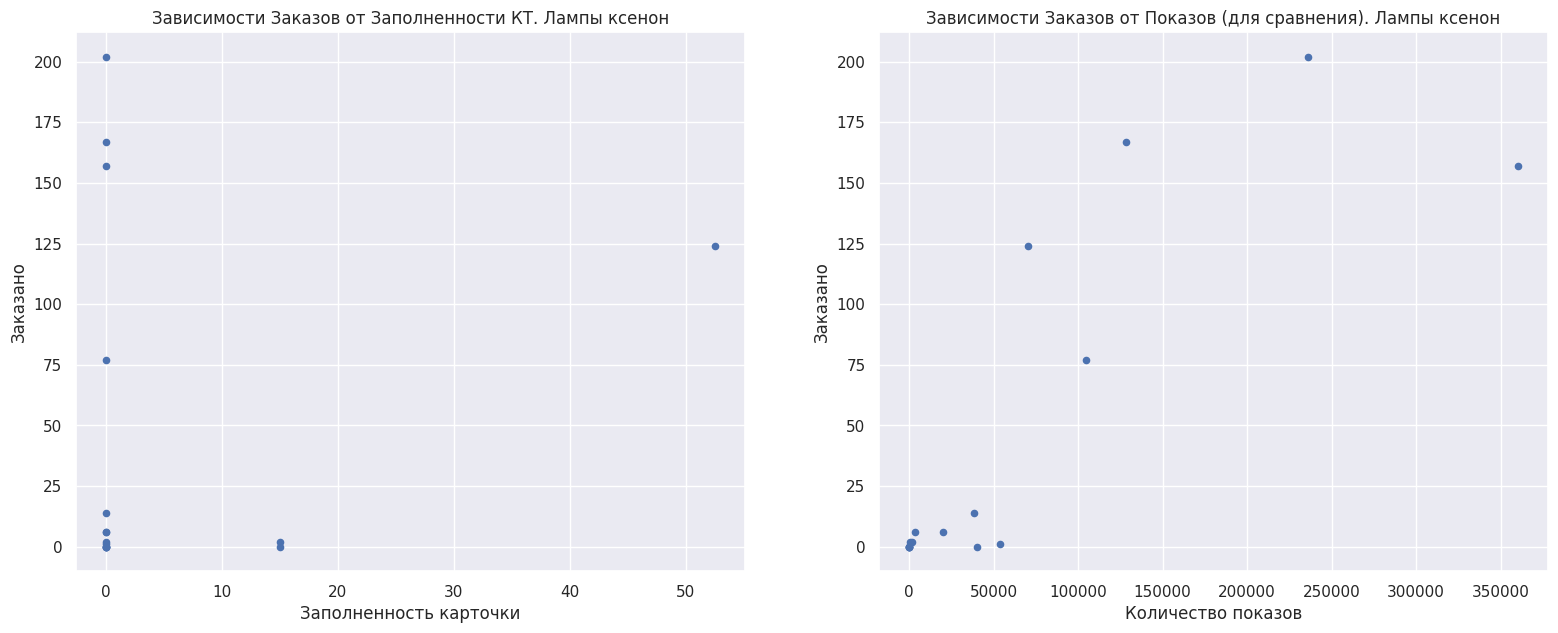

In [84]:
x = xenon_full['Контент-рейтинг']
y = xenon_full['Заказано товаров']
z = xenon_full['Показы, всего']

# Построение и вывод графика
plt.figure(figsize=(19, 7))
plt.subplot(121)
plt.title('Зависимости Заказов от Заполненности КТ. Лампы ксенон')
plt.scatter(x, y, s=20, c="b", marker='o')
plt.xlabel('Заполненность карточки')
plt.ylabel('Заказано')
plt.subplot(122)
plt.title('Зависимости Заказов от Показов (для сравнения). Лампы ксенон')
plt.scatter(z, y, s=20, c="b", marker='o')
plt.xlabel('Количество показов')
plt.ylabel('Заказано')
plt.show()

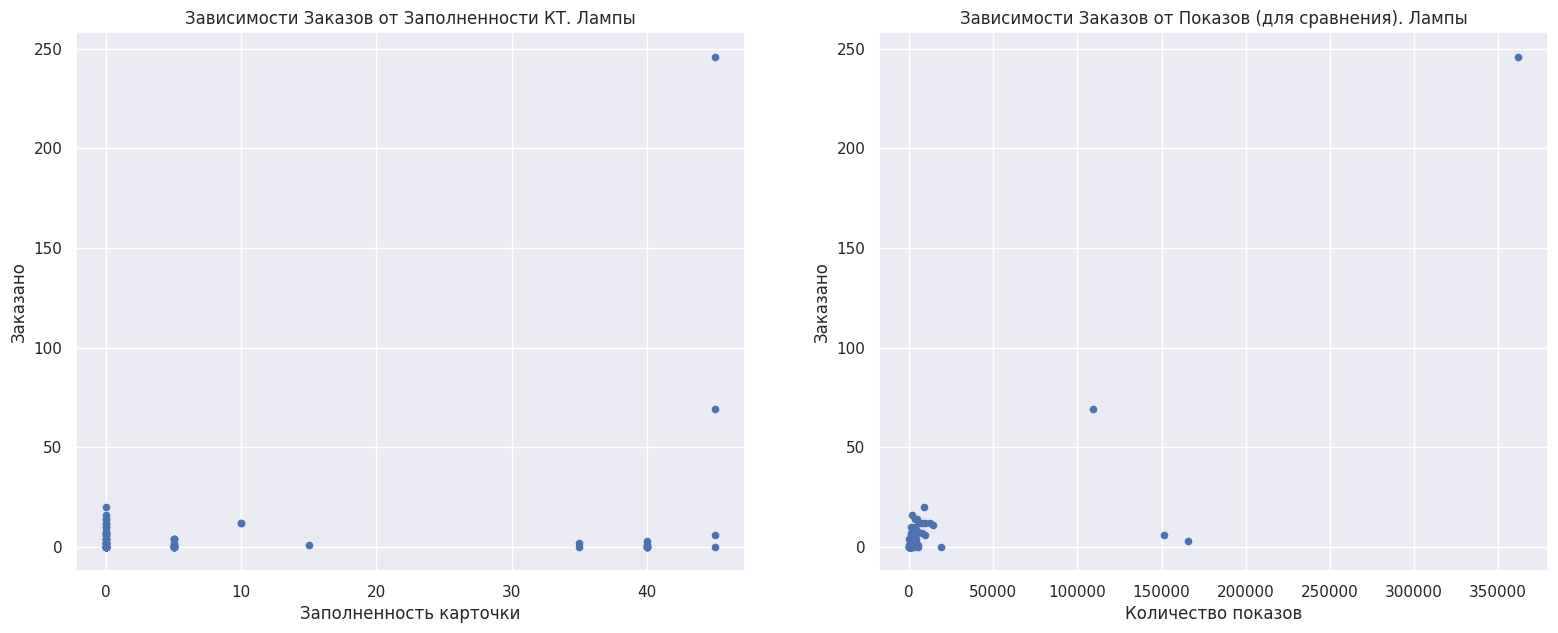

In [85]:
x = lamp_full['Контент-рейтинг']
y = lamp_full['Заказано товаров']
z = lamp_full['Показы, всего']

# Построение и вывод графика
plt.figure(figsize=(19, 7))
plt.subplot(121)
plt.title('Зависимости Заказов от Заполненности КТ. Лампы')
plt.scatter(x, y, s=20, c="b", marker='o')
plt.xlabel('Заполненность карточки')
plt.ylabel('Заказано')
plt.subplot(122)
plt.title('Зависимости Заказов от Показов (для сравнения). Лампы')
plt.scatter(z, y, s=20, c="b", marker='o')
plt.xlabel('Количество показов')
plt.ylabel('Заказано')
plt.show()

**Выводы**: Как видно из кореляций на Тепловой карте зависимость заполненности КТ на количество заказов существует. На точечном графике явная зависимость видна только на товарах Фара, у остальных данные по зависимости нейтральные (Лампы) или обратные (Лампы ксенон). Но у всех товаров видна прямая зависимость от показов.
